# 1. Data Preparation

Pull Frederal Reserve data using pandas_datareader

In [4]:
import datetime
import pandas as pd
from pandas_datareader import data as pdr
from matplotlib import pyplot as plt

In [3]:
# Define the start and end date of the data range
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime.today()

# Pull data from the FRED api using pandas_datareader
tickers = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']
name = ['1MO', '3MO', '6MO', '1YR', '2YR', '3YR', '5YR', '7YR', '10YR', '20YR', '30YR']
yield_df = pdr.get_data_fred(tickers, start, end).dropna()      # drop missing values
yield_df = df.rename(columns={tickers[i]:name[i] for i in range(len(tickers))})
yield_df

,1MO,3MO,6MO,1YR,2YR,3YR,5YR,7YR,10YR,20YR,30YR
DATE,,,,,,,,,,,
2005-01-03,1.99,2.32,2.63,2.79,3.10,3.28,3.64,3.94,4.23,4.84,4.85
2005-01-04,2.05,2.33,2.63,2.82,3.20,3.38,3.72,4.02,4.29,4.91,4.91
2005-01-05,2.04,2.33,2.63,2.83,3.22,3.39,3.73,4.02,4.29,4.88,4.88
2005-01-06,2.04,2.31,2.63,2.82,3.18,3.36,3.71,4.01,4.29,4.88,4.89
2005-01-07,2.03,2.32,2.63,2.82,3.20,3.40,3.73,4.03,4.29,4.88,4.88
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-03,4.35,4.18,3.96,3.77,3.61,3.58,3.69,3.92,4.22,4.85,4.90
2025-09-04,4.33,4.16,3.94,3.76,3.59,3.55,3.65,3.87,4.17,4.81,4.86
2025-09-05,4.29,4.07,3.85,3.65,3.51,3.48,3.59,3.80,4.10,4.72,4.78


In [5]:
# Save data in the data folder
yield_df.to_csv('../data/yield.csv', index=True)   # Keep the dates

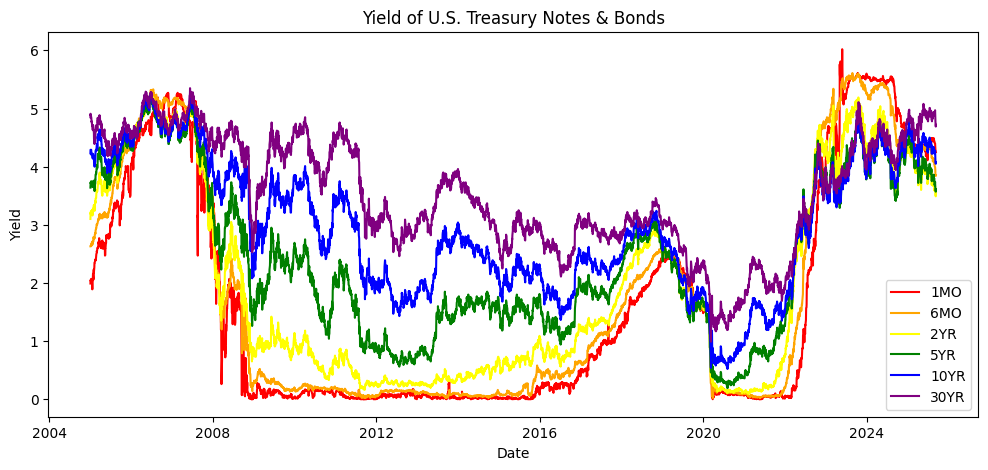

In [7]:
# Plot yields through time
plt.figure(figsize = (12,5))
plt.plot(yield_df['1MO'], color='red', label='1MO')
plt.plot(yield_df['6MO'], color='orange', label='6MO')
plt.plot(yield_df['2YR'], color='yellow', label='2YR')
plt.plot(yield_df['5YR'], color='green', label='5YR')
plt.plot(yield_df['10YR'], color='blue', label='10YR')
plt.plot(yield_df['30YR'], color='purple', label='30YR')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.title('Yield of U.S. Treasury Notes & Bonds')
plt.show()